In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.ensemble as ens
import sklearn.metrics as met
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("decisiontree_ch6.csv")
data.head(5)

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus


In [3]:
codes = {
    "mesin": {"bensin":0, "diesel":1},
    "penggerak": {"depan":0, "belakang":1},
    "label": {"sedan":0, "minibus":1}
}
data.replace(codes, inplace=True)
data.head(5)

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,0
1,2,0,2,0,0
2,3,0,8,1,1
3,4,1,6,0,1
4,5,0,5,1,1


In [4]:
X = data.iloc[:, :4]
y = data["label"]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
model = ens.RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [5]:
y_pred = model.predict(X_test)
print(y_test, y_pred)

33    1
4     1
20    0
5     1
10    0
13    0
36    1
15    0
Name: label, dtype: int64 [1 1 1 1 0 0 0 0]


In [6]:
acc = met.accuracy_score(y_test, y_pred)
print(acc)

0.75


# Cek akurasi score yang tinggi di Feature

In [7]:
score = model.feature_importances_
print(score)

[0.18253102 0.02773705 0.62307154 0.16666038]


<AxesSubplot:>

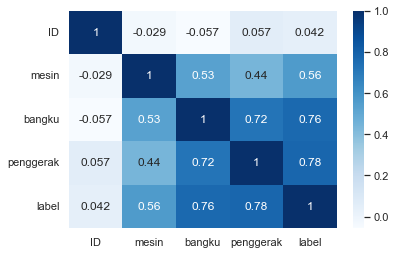

In [8]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)